<a href="https://colab.research.google.com/github/LuvMutreja/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Regression_Project_Yes_Bank_Stock_Closing_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [109]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy.random import randn
from datetime import datetime
from datetime import date
from numpy import math
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import ttest_1samp
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') 

### Dataset Loading

In [110]:
# Loading the Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Alma Better/Module 4 Machine Learning/#Capstone Projects/Regression Capstone Project- Yes Bank Stock Closing Price Prediction /data_YesBank_StockPrices.csv')

### Dataset First View

In [112]:
# Dataset First Look
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [113]:
# Dataset Rows & Columns count
dataset.shape

(185, 5)

### Dataset Information

In [114]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [115]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [116]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [117]:
# Dataset Columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [118]:
# Dataset Describe
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

1.Date- Month and Year for the corresponding record.

2.Open- Price at which the stock started trading when the market opened on 1st day of the month.

3.High- Highest price at which a stock traded during a period.

4.Low- Lowest price at which a stock traded during a period.

5.Close- Price at which last buy and sale order was executed between two traders on the last day of the month.

### Check Unique Values for each variable.

In [119]:
# Check Unique Values for each variable.
for col in dataset.columns:
  print('Number of unique values in ',col,' is ',dataset[col].nunique())

Number of unique values in  Date  is  185
Number of unique values in  Open  is  183
Number of unique values in  High  is  184
Number of unique values in  Low  is  183
Number of unique values in  Close  is  185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [120]:
# Write your code to make your dataset analysis ready.
def date_to_str(l):
  s='1/'
  if 'Jan'in l[0]:
    s=s+'01/'
  elif 'Feb'in l[0]:
    s=s+'02/'
  elif 'Mar'in l[0]:
    s=s+'03/'
  elif 'Apr'in l[0]:
    s=s+'04/'
  elif 'May'in l[0]:
    s=s+'05/'
  elif 'Jun'in l[0]:
    s=s+'06/'
  elif 'Jul'in l[0]:
    s=s+'07/'
  elif 'Aug'in l[0]:
    s=s+'08/'
  elif 'Sep'in l[0]:
    s=s+'09/'
  elif 'Oct'in l[0]:
    s=s+'10/'
  elif 'Nov'in l[0]:
    s=s+'11/'
  elif 'Dec'in l[0]:
    s=s+'12/'    
  s=s+l[1]
  return s                   

In [121]:
dataset['date']=dataset.apply(lambda x1:date_to_str(x1['Date'].split('-')),axis=1)
# (date_to_str())

In [122]:
dataset[:20]

,Date,Open,High,Low,Close,date
0,Jul-05,13.00,14.00,11.25,12.46,1/07/05
1,Aug-05,12.58,14.88,12.55,13.42,1/08/05
2,Sep-05,13.48,14.87,12.27,13.30,1/09/05
3,Oct-05,13.20,14.47,12.40,12.99,1/10/05
4,Nov-05,13.35,13.88,12.88,13.41,1/11/05
5,Dec-05,13.49,14.44,13.00,13.71,1/12/05
6,Jan-06,13.68,17.16,13.58,15.33,1/01/06
7,Feb-06,15.50,16.97,15.40,16.12,1/02/06
8,Mar-06,16.20,20.95,16.02,20.08,1/03/06
9,Apr-06,20.56,20.80,18.02,19.49,1/04/06


In [123]:
dataset.drop(['Date'],axis=1,inplace=True)

In [124]:
dataset

,Open,High,Low,Close,date
0,13.00,14.00,11.25,12.46,1/07/05
1,12.58,14.88,12.55,13.42,1/08/05
2,13.48,14.87,12.27,13.30,1/09/05
3,13.20,14.47,12.40,12.99,1/10/05
4,13.35,13.88,12.88,13.41,1/11/05
...,...,...,...,...,...
180,25.60,28.30,11.10,11.95,1/07/20
181,12.00,17.16,11.85,14.37,1/08/20
182,14.30,15.34,12.75,13.15,1/09/20
183,13.30,14.01,12.11,12.42,1/10/20


In [125]:
dataset['Date']= dataset['date'].apply(lambda x2:datetime.strptime(x2,'%d/%m/%y')) 

In [126]:
dataset[:20]

,Open,High,Low,Close,date,Date
0,13.00,14.00,11.25,12.46,1/07/05,2005-07-01
1,12.58,14.88,12.55,13.42,1/08/05,2005-08-01
2,13.48,14.87,12.27,13.30,1/09/05,2005-09-01
3,13.20,14.47,12.40,12.99,1/10/05,2005-10-01
4,13.35,13.88,12.88,13.41,1/11/05,2005-11-01
5,13.49,14.44,13.00,13.71,1/12/05,2005-12-01
6,13.68,17.16,13.58,15.33,1/01/06,2006-01-01
7,15.50,16.97,15.40,16.12,1/02/06,2006-02-01
8,16.20,20.95,16.02,20.08,1/03/06,2006-03-01
9,20.56,20.80,18.02,19.49,1/04/06,2006-04-01


In [127]:
print(f'DataFrame contains stock prices from {dataset.Date.min()} to {dataset.Date.max()}')

DataFrame contains stock prices from 2005-07-01 00:00:00 to 2020-11-01 00:00:00


In [128]:
print(f'DataFrame contains stock prices for {dataset.Date.max()-dataset.Date.min()} days'[:-14])

DataFrame contains stock prices for 5602 days


In [129]:
dataset['Year'] = dataset['Date'].apply(lambda x3: x3.year)

In [130]:
dataset

,Open,High,Low,Close,date,Date,Year
0,13.00,14.00,11.25,12.46,1/07/05,2005-07-01,2005
1,12.58,14.88,12.55,13.42,1/08/05,2005-08-01,2005
2,13.48,14.87,12.27,13.30,1/09/05,2005-09-01,2005
3,13.20,14.47,12.40,12.99,1/10/05,2005-10-01,2005
4,13.35,13.88,12.88,13.41,1/11/05,2005-11-01,2005
...,...,...,...,...,...,...,...
180,25.60,28.30,11.10,11.95,1/07/20,2020-07-01,2020
181,12.00,17.16,11.85,14.37,1/08/20,2020-08-01,2020
182,14.30,15.34,12.75,13.15,1/09/20,2020-09-01,2020
183,13.30,14.01,12.11,12.42,1/10/20,2020-10-01,2020


In [131]:
dataset['Month']= dataset['Date'].apply(lambda x4:x4.month)

In [132]:
dataset[:20]

,Open,High,Low,Close,date,Date,Year,Month
0,13.00,14.00,11.25,12.46,1/07/05,2005-07-01,2005,7
1,12.58,14.88,12.55,13.42,1/08/05,2005-08-01,2005,8
2,13.48,14.87,12.27,13.30,1/09/05,2005-09-01,2005,9
3,13.20,14.47,12.40,12.99,1/10/05,2005-10-01,2005,10
4,13.35,13.88,12.88,13.41,1/11/05,2005-11-01,2005,11
5,13.49,14.44,13.00,13.71,1/12/05,2005-12-01,2005,12
6,13.68,17.16,13.58,15.33,1/01/06,2006-01-01,2006,1
7,15.50,16.97,15.40,16.12,1/02/06,2006-02-01,2006,2
8,16.20,20.95,16.02,20.08,1/03/06,2006-03-01,2006,3
9,20.56,20.80,18.02,19.49,1/04/06,2006-04-01,2006,4


In [133]:
dataset.drop(['date'],inplace=True,axis=1)

In [134]:
dataset

,Open,High,Low,Close,Date,Year,Month
0,13.00,14.00,11.25,12.46,2005-07-01,2005,7
1,12.58,14.88,12.55,13.42,2005-08-01,2005,8
2,13.48,14.87,12.27,13.30,2005-09-01,2005,9
3,13.20,14.47,12.40,12.99,2005-10-01,2005,10
4,13.35,13.88,12.88,13.41,2005-11-01,2005,11
...,...,...,...,...,...,...,...
180,25.60,28.30,11.10,11.95,2020-07-01,2020,7
181,12.00,17.16,11.85,14.37,2020-08-01,2020,8
182,14.30,15.34,12.75,13.15,2020-09-01,2020,9
183,13.30,14.01,12.11,12.42,2020-10-01,2020,10


In [135]:
def comparing_with_next_record_of_another_list(l1,l2):
  l1=l1[:-1]
  l2=l2[1:] 
  l3=list(zip(l1,l2))
  df=pd.DataFrame(l3,columns=['Closing Price','Opening Price'])
  return df    

In [136]:
comparing_nthcp_with_n_minus_1thop=comparing_with_next_record_of_another_list(dataset['Close'].tolist(),dataset['Open'].tolist())

In [137]:
comparing_nthcp_with_n_minus_1thop

,Closing Price,Opening Price
0,12.46,12.58
1,13.42,13.48
2,13.30,13.20
3,12.99,13.35
4,13.41,13.49
...,...,...
179,25.60,25.60
180,11.95,12.00
181,14.37,14.30
182,13.15,13.30


In [138]:
change_in_csp = dataset['Close'].diff()  

In [139]:
print(type(change_in_csp))
change_in_csp

<class 'pandas.core.series.Series'>


0        NaN
1       0.96
2      -0.12
3      -0.31
4       0.42
       ...  
180   -13.65
181     2.42
182    -1.22
183    -0.73
184     2.25
Name: Close, Length: 185, dtype: float64

In [140]:
dataset.set_index(['Date'])

,Open,High,Low,Close,Year,Month
Date,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,2005,7
2005-08-01,12.58,14.88,12.55,13.42,2005,8
2005-09-01,13.48,14.87,12.27,13.30,2005,9
2005-10-01,13.20,14.47,12.40,12.99,2005,10
2005-11-01,13.35,13.88,12.88,13.41,2005,11
...,...,...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95,2020,7
2020-08-01,12.00,17.16,11.85,14.37,2020,8
2020-09-01,14.30,15.34,12.75,13.15,2020,9


In [141]:
quarterly = dataset.set_index(['Date']).resample('Q').mean()

In [142]:
quarterly

,Open,High,Low,Close,Year,Month
Date,,,,,,
2005-09-30,13.020000,14.583333,12.023333,13.060000,2005.0,8.0
2005-12-31,13.346667,14.263333,12.760000,13.370000,2005.0,11.0
2006-03-31,15.126667,18.360000,15.000000,17.176667,2006.0,2.0
2006-06-30,19.520000,20.333333,15.740000,17.713333,2006.0,5.0
2006-09-30,16.633333,18.226667,15.440000,17.486667,2006.0,8.0
...,...,...,...,...,...,...
2019-12-31,61.000000,74.166667,43.233333,61.900000,2019.0,11.0
2020-03-31,40.400000,59.050000,25.233333,32.066667,2020.0,2.0
2020-06-30,25.950000,31.333333,23.683333,26.800000,2020.0,5.0


In [143]:
yearly= dataset.set_index(['Date']).resample('Y').mean()

In [144]:
yearly

,Open,High,Low,Close,Year,Month
Date,,,,,,
2005-12-31,13.183333,14.423333,12.391667,13.215000,2005.0,9.5
2006-12-31,18.401667,21.090833,16.903333,19.350000,2006.0,6.5
2007-12-31,35.160833,39.743333,31.830000,36.873333,2007.0,6.5
2008-12-31,31.292500,34.330833,23.335000,28.252500,2008.0,6.5
2009-12-31,26.940833,32.678333,24.275833,30.032500,2009.0,6.5
2010-12-31,57.946667,63.508333,53.880833,58.645833,2010.0,6.5
2011-12-31,58.865000,63.341667,52.275833,57.223333,2011.0,6.5
2012-12-31,70.648333,77.577500,67.428333,74.281667,2012.0,6.5
2013-12-31,82.608333,92.748333,72.990833,80.585000,2013.0,6.5


In [145]:
yearly.shape

(16, 6)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [146]:
# Chart - 1 visualization code
px.line(dataset,x='Date',y='Close',title='Closing Stock Price Trend for the entire duration' )

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [147]:
# Chart - 2 visualization code
px.bar(dataset,x='Year',y='Close',title='Year wise Closing Stock Price')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [148]:
# Chart - 3 visualization code
px.scatter(dataset, x="Month", y="Close",size="Open")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [149]:
# Chart - 4 visualization code
px.bar(dataset,x='Month',y='High')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [150]:
# Chart - 5 visualization code
px.scatter(dataset,x='Open',y='Close',size='High')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [151]:
# Chart - 6 visualization code
px.scatter(dataset,x='High',y='Close',size='Open')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [152]:
# Chart - 7 visualization code
px.scatter(dataset,x='Low',y='Close',size='Open')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [153]:
# Chart - 9 visualization code
px.box(dataset[['Open','High','Low','Close']],points='all')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [154]:
# Chart - 10 visualization code
px.line(change_in_csp)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [155]:
# Chart - 11 visualization code
px.bar(comparing_nthcp_with_n_minus_1thop,barmode='group',width=6000, height=500)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11


In [156]:
comparing_nthcp_with_n_minus_1thop.diff(1,axis=1)

,Closing Price,Opening Price
0,NaN,0.12
1,NaN,0.06
2,NaN,-0.10
3,NaN,0.36
4,NaN,0.08
...,...,...
179,NaN,0.00
180,NaN,0.05
181,NaN,-0.07
182,NaN,0.15


In [157]:
# Chart - 8 visualization code
px.line(comparing_nthcp_with_n_minus_1thop.diff(1,axis=1),title=" Change in Opening Stock Price from last month's Closing Stock Price (nth Csp - n+1th Osp) ").update_layout(showlegend=False)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [158]:
# Chart - 12 visualization code
px.scatter(quarterly,x=['Open','High','Low'],y='Close')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [159]:
# Chart - 13 visualization code
px.line(yearly[['Open','High','Low','Close']])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14

In [160]:
# Chart - 12 visualization code
px.pie(dataset ,values=dataset[['Open','High','Low','Close']].mean(),names=dataset.columns[:-3], title='Mean Values of [Open,High,Low,Close]',width=400,height=400)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 15 - Correlation Heatmap

In [161]:
# Correlation Heatmap visualization code

### Correlation Check

In [162]:
dataset.corr()

,Open,High,Low,Close,Year,Month
Open,1.000000,0.993040,0.983978,0.977971,0.624325,-0.034239
High,0.993040,1.000000,0.983422,0.985051,0.638603,-0.042511
Low,0.983978,0.983422,1.000000,0.995358,0.599056,-0.041818
Close,0.977971,0.985051,0.995358,1.000000,0.608408,-0.055796
Year,0.624325,0.638603,0.599056,0.608408,1.000000,-0.063055
Month,-0.034239,-0.042511,-0.041818,-0.055796,-0.063055,1.000000


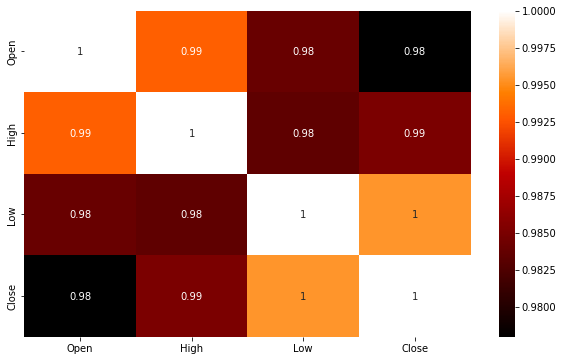

In [163]:
correlation=dataset[['Open','High','Low','Close']].corr()
sns.heatmap(correlation,annot=True,cmap='gist_heat')
plt.show()

In [164]:
def calc_vif(dataset):
  Vif=pd.DataFrame()
  Vif['features']=dataset.columns
  Vif['vif value'] =[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return Vif 

In [165]:
calc_vif(dataset[dataset.columns[:-4]])

,features,vif value
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [166]:
dataset[['Open','High','Low','Close']].corr().Close

Open     0.977971
High     0.985051
Low      0.995358
Close    1.000000
Name: Close, dtype: float64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 16 - Pair Plot 

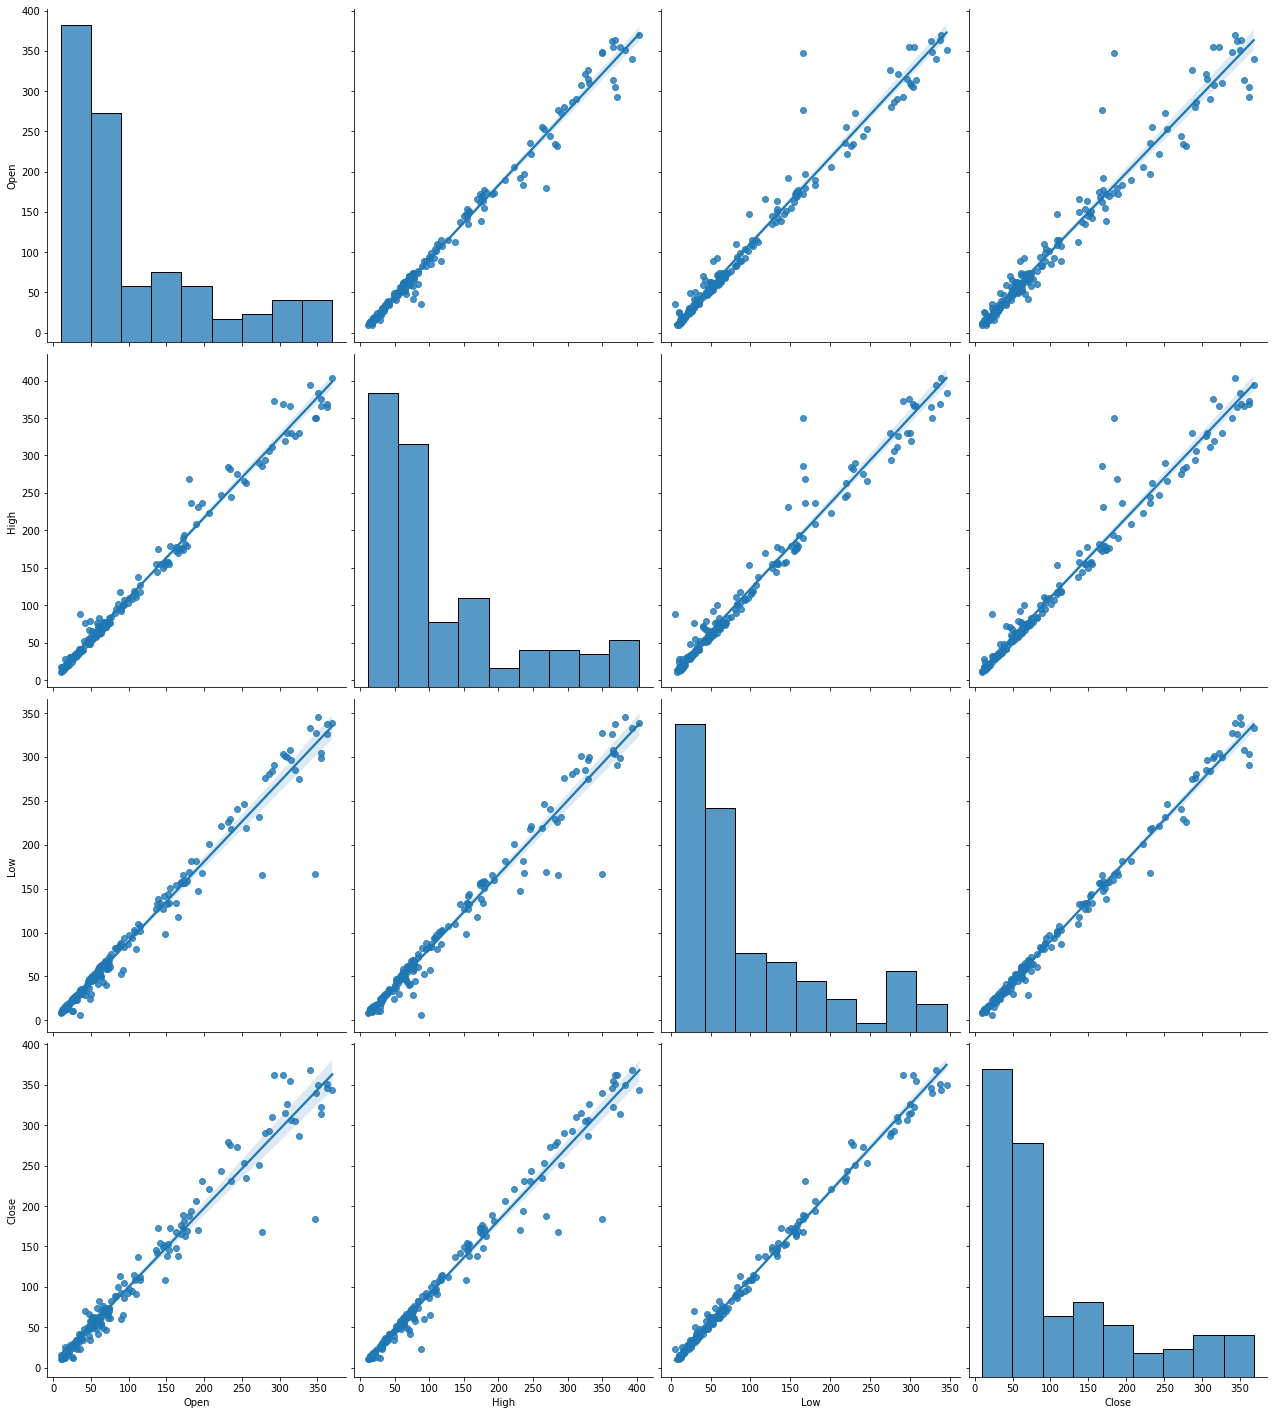

In [167]:
# Pair Plot visualization code
sns.pairplot(dataset,x_vars=['Open','High','Low','Close'],y_vars=['Open','High','Low','Close'],kind='reg',size=5, aspect=0.9)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Closing Stock Price follows a normal distribution


---


2. Sample mean and population mean are same


---


3. Independent and dependent variables are not correlated i.e. 
There is no statistically significant relationship between the predictor variable, x, and the response variable, y.

### Hypothetical Statement - 1


---


Closing Stock Price follows a normal distribution 

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Closing stock price follows a normal distribution. 

Alternate Hypothesis : Closing stock price does not follow a normal distribution.

#### 2. Perform an appropriate statistical test.

In [168]:
# Perform Statistical Test to obtain P-Value
data_to_test = dataset['Close']
stat,p_value = shapiro(data_to_test)
print(round(stat,5),round(p_value,30))
if p_value>0.05:
  print('We fail to reject null hypothesis as the target variable is Normally Distributed')
else:
  print('We reject null hypothesis as the target variable is not Normally Distributed')  

0.81698 5.694285375255209e-14
We reject null hypothesis as the target variable is not Normally Distributed


In [169]:
data_to_test=randn(100)
stat,p_value1 = shapiro(data_to_test)
print(round(stat,5),round(p_value1,30))
if p_value1>0.05:
  print('We fail to reject null hypothesis as the target variable is Normally Distributed')
else:
  print('We reject null hypothesis as the target variable is not Normally Distributed')

0.99272 0.8704312443733215
We fail to reject null hypothesis as the target variable is Normally Distributed


##### Which statistical test have you done to obtain P-Value?

Used shapiro (a built in function of scipy library) to obtain the P value. 

##### Why did you choose the specific statistical test?

I used shapiro because it is used to check if a perticular thing(closing stock price in this case) is normally disrtributed or not. 

### Hypothetical Statement - 2


---


Sample mean and population mean are same

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Sample mean and population mean are same

Alternate Hypothesis : Sample mean and population mean are not same

#### 2. Perform an appropriate statistical test.

In [170]:
# Perform Statistical Test to obtain P-Value
population= dataset['Close'].values
len(population)

185

In [171]:
sample_size=18
population_sample= np.random.choice(population,sample_size)
population_sample

array([168.  , 351.15,  30.31,  26.85,  48.65,  26.85,  55.61, 137.9 ,
        15.45,  62.22, 147.95,  59.5 , 136.83, 154.57,  61.98, 194.3 ,
        33.45,  82.29])

In [172]:
ttest,p_value2 = ttest_1samp(population_sample,population.mean())
print(round(ttest,5),round(p_value2,10))
if p_value2>0.05:
  print('We fail to reject null hypothesis')
else:
  print('We reject null hypothesis')

-0.27862 0.7838937675
We fail to reject null hypothesis


In [173]:
print(population.mean(),population_sample.mean())

105.2047027027027 99.65888888888888


##### Which statistical test have you done to obtain P-Value?

used T Test to obtain the p value

##### Why did you choose the specific statistical test?

Because i wanted to check if popualtion and sample mean are same or not and T test fulfils this purpose  

### Hypothetical Statement - 3


---


Independent and dependent variables are not correlated i.e. 
There is no statistically significant relationship between the predictor variable, x, and the response variable, y.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: Independent and dependent variables are not correlated 

Alternate Hypothesis : Independent and dependent variables are correlated

#### 2. Perform an appropriate statistical test.

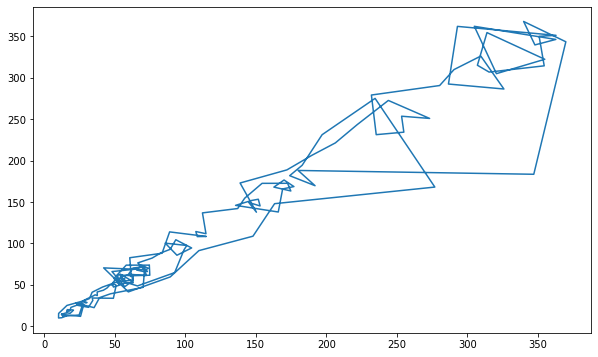

In [174]:
# Perform Statistical Test to obtain P-Value
independent_variables = dataset['Open']
dependent_variable= dataset['Close']
plt.plot(independent_variables,dependent_variable)
plt.show()

In [175]:
stat,p_value3 = pearsonr(independent_variables,dependent_variable)
print(round(stat,5),round(p_value3,126))
if p_value3>0.05:
  print('We fail to reject null hypothesis as there is no statistically significant relationship between the independent variable and the dependent variable.')
else:
  print('We reject null hypothesis as as there is significant relationship between the independent variable and the dependent variable.')

0.97797 1.999999999999999e-126
We reject null hypothesis as as there is significant relationship between the independent variable and the dependent variable.


##### Which statistical test have you done to obtain P-Value?

Pearson's correlation test

##### Why did you choose the specific statistical test?

Because it finds if the independent and the dependent variables are correlated or not 

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

In [222]:
dataset.isnull().sum()

Open     0
High     0
Low      0
Close    0
Date     0
Year     0
Month    0
dtype: int64

As we can see there are no missing values in this dataset

### 2. Handling Outliers

In [220]:
# Handling Outliers & Outlier treatments
px.box(dataset[['Open','High','Low','Close']],points='all')

In [221]:
px.box(np.log(dataset[['Open','High','Low','Close']]),points='all')

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used log transfromation technique because my data was right skewed and so log transfromation served 2 purpose


*   Normalized the data (Transformed the data from right skewed to normal distribution)
*   Removed Outliers



### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

No categorical data was present in this dataset

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [179]:
# Expand Contraction

#### 2. Lower Casing

In [180]:
# Lower Casing

#### 3. Removing Punctuations

In [181]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [182]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [183]:
# Remove Stopwords

In [184]:
# Remove White spaces

#### 6. Rephrase Text

In [185]:
# Rephrase Text

#### 7. Tokenization

In [186]:
# Tokenization

#### 8. Text Normalization

In [187]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [188]:
# POS Taging

#### 10. Text Vectorization

In [189]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [190]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [191]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

In [192]:
# Transform Your data

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

### 6. Data Scaling

In [193]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [194]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [195]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [196]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [197]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [198]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [199]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [200]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [201]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [202]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [203]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [204]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [205]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [206]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

In [207]:
# dataset=dataset[dataset.describe().columns]

### Distribution Check 

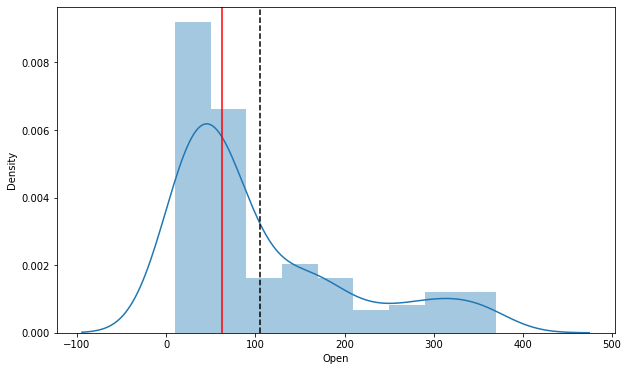

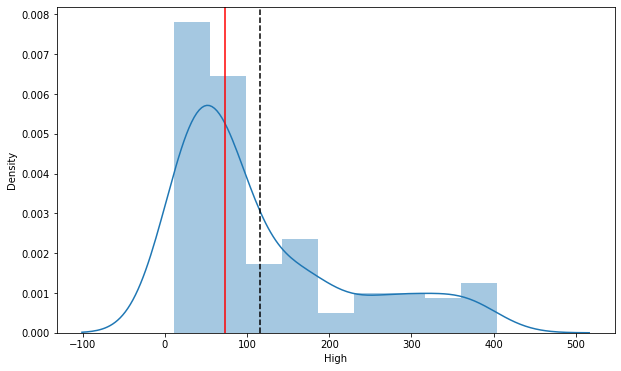

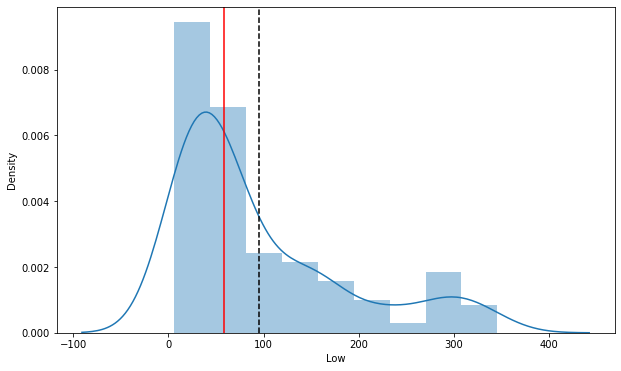

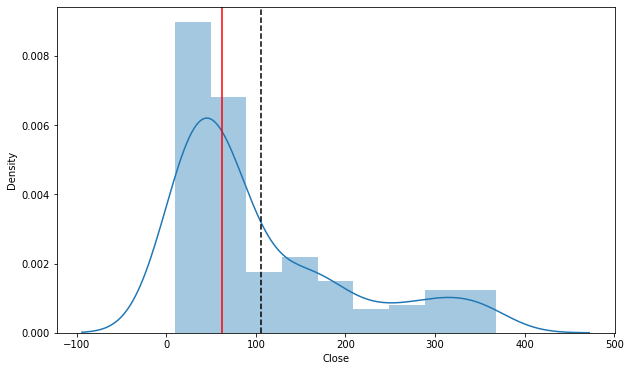

In [208]:
plt.rcParams['figure.figsize'] = (10,6)
for col in dataset.columns[:-3]:
  sns.distplot(dataset[col])
  plt.axvline(dataset[col].mean(),color='black',linestyle='--')
  plt.axvline(dataset[col].median(),color='red',ls='solid')
  plt.show()

Distribution Transformation

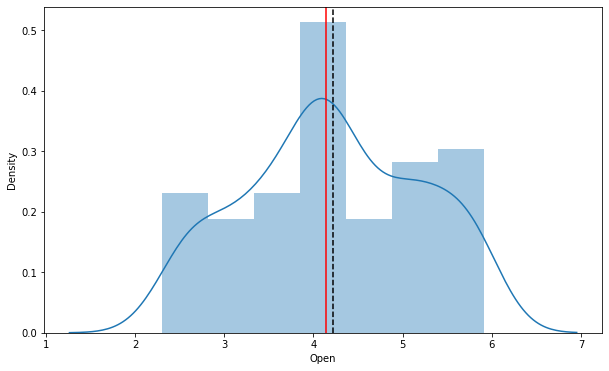

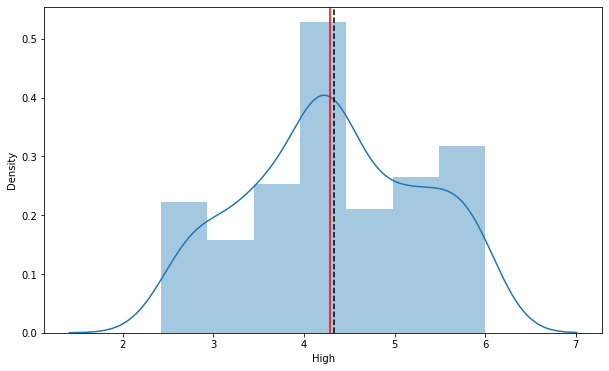

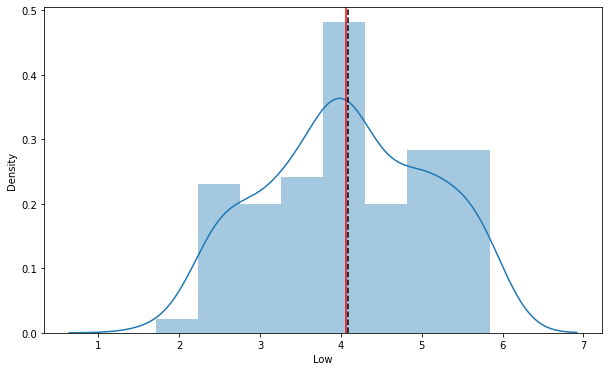

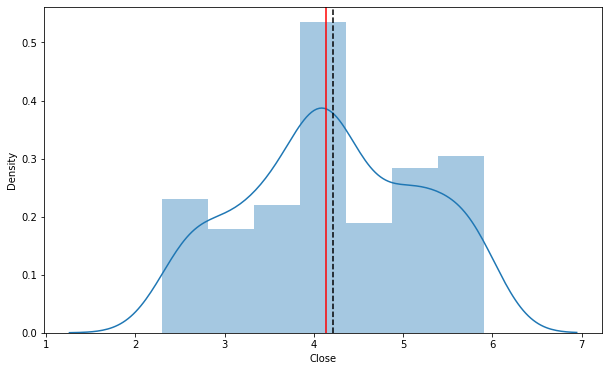

In [209]:
for col in dataset.columns[:-3]:
  sns.distplot(np.log(dataset[col]))
  plt.axvline(np.log(dataset[col]).mean(),color='black',ls='--')
  plt.axvline(np.log(dataset[col]).median(),color='red',ls='solid')
  plt.show()

In [210]:
dataset1=dataset.copy()

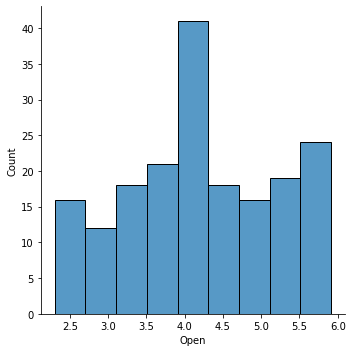

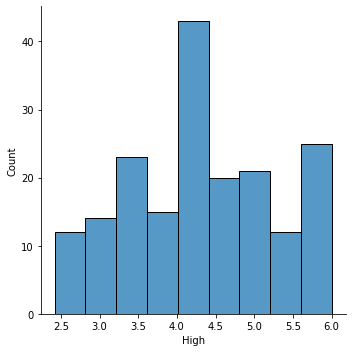

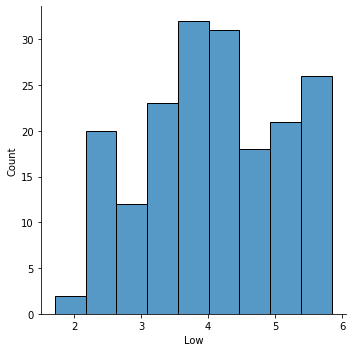

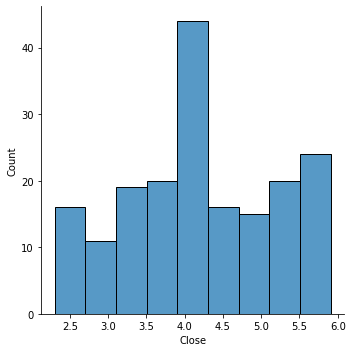

In [211]:
for col in dataset.columns[:-3]:
  dataset1[col]=np.log(dataset[col])
  sns.displot(dataset1[col])
  plt.show()

In [212]:
dataset.head()

,Open,High,Low,Close,Date,Year,Month
0,13.00,14.00,11.25,12.46,2005-07-01,2005,7
1,12.58,14.88,12.55,13.42,2005-08-01,2005,8
2,13.48,14.87,12.27,13.30,2005-09-01,2005,9
3,13.20,14.47,12.40,12.99,2005-10-01,2005,10
4,13.35,13.88,12.88,13.41,2005-11-01,2005,11


In [213]:
dataset1.head()

,Open,High,Low,Close,Date,Year,Month
0,2.564949,2.639057,2.420368,2.522524,2005-07-01,2005,7
1,2.532108,2.700018,2.529721,2.596746,2005-08-01,2005,8
2,2.601207,2.699346,2.507157,2.587764,2005-09-01,2005,9
3,2.580217,2.672078,2.517696,2.564180,2005-10-01,2005,10
4,2.591516,2.630449,2.555676,2.596001,2005-11-01,2005,11


### **Data's Spread**

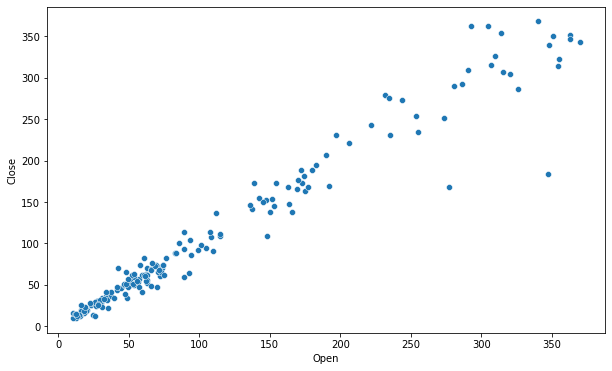

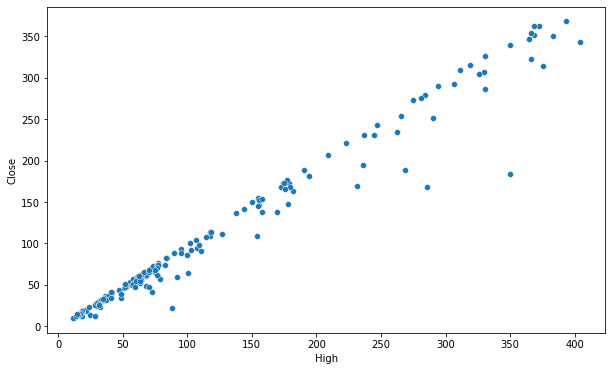

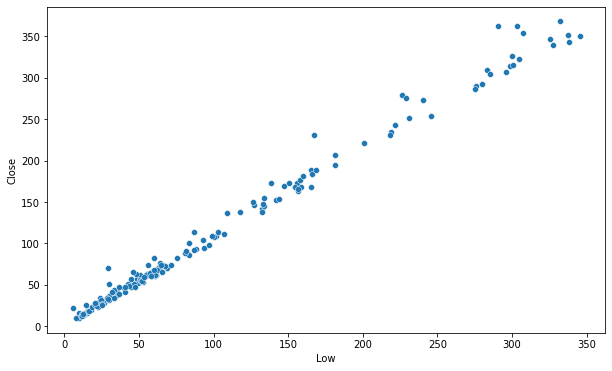

In [214]:
for col in dataset.columns[:-4]:
  sns.scatterplot(data=dataset,x=dataset[col],y='Close')
  plt.show()